<a href="https://colab.research.google.com/github/yinglingyang/Data-Science-with-Python/blob/main/Regression_Models_for_House_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Models for House Sales Prediction

## 1 Load Data and Import libraries

data link: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2 Data Desciption

In [4]:
df.shape

(21613, 21)

In [5]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3 Data Exploration

### 3.1 Distribution of Target

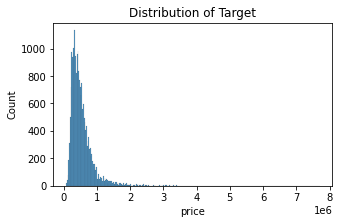

In [11]:
plt.figure(figsize = (5,3))
sns.histplot(x = 'price', data = df)
plt.title('Distribution of Target')
plt.show()

Coclusion: the distribution of target variable is skewed

### 3.2 The Distribution of Some Numerical Features

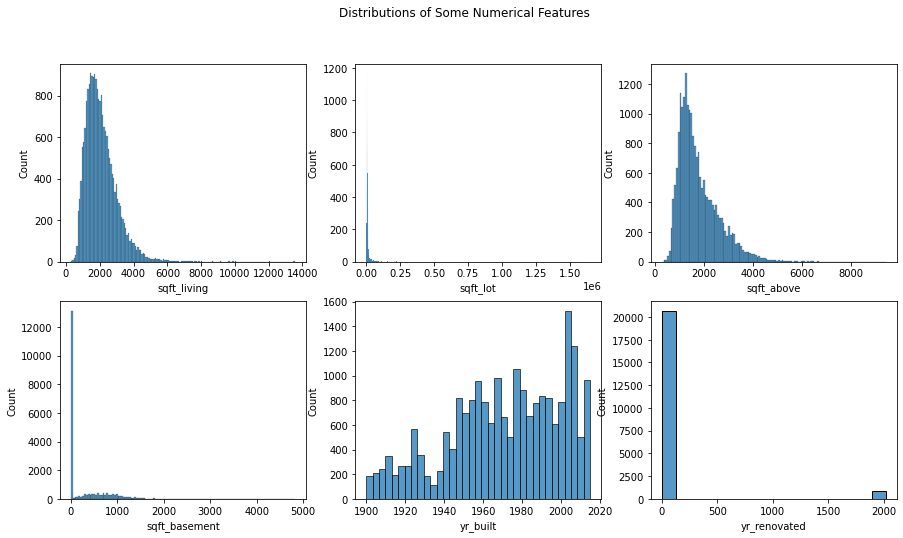

In [12]:
list1 = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']

plt.figure(figsize = (15,8))
for i, col in enumerate(list1):
    plt.subplot(2,3,i+1)
    sns.histplot(x = col, data = df)
plt.suptitle('Distributions of Some Numerical Features')
plt.show()

Conclusion: the distribution of some features are skewed

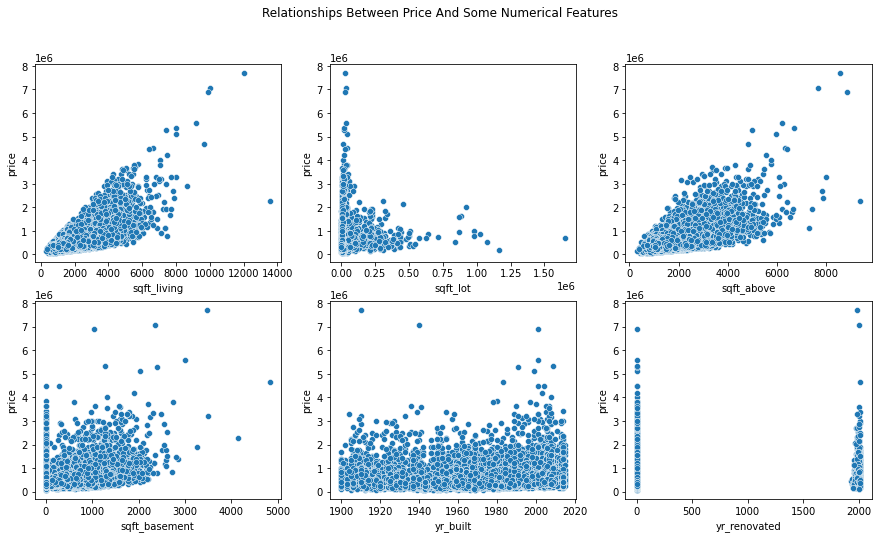

In [13]:
plt.figure(figsize = (15,8))
for i, col in enumerate(list1):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x = col, y='price', data = df)
plt.suptitle('Relationships Between Price And Some Numerical Features')
plt.show()

In [14]:
list1_y = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'price']
corr = df[list1_y].corr()
print("Pearson correlation between 'price' and features:")
corr.iloc[6,0:6].sort_values(ascending=False)

Pearson correlation between 'price' and features:


sqft_living      0.702035
sqft_above       0.605567
sqft_basement    0.323816
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
Name: price, dtype: float64

Conclusion: there is strong linear relationship between house size and price.

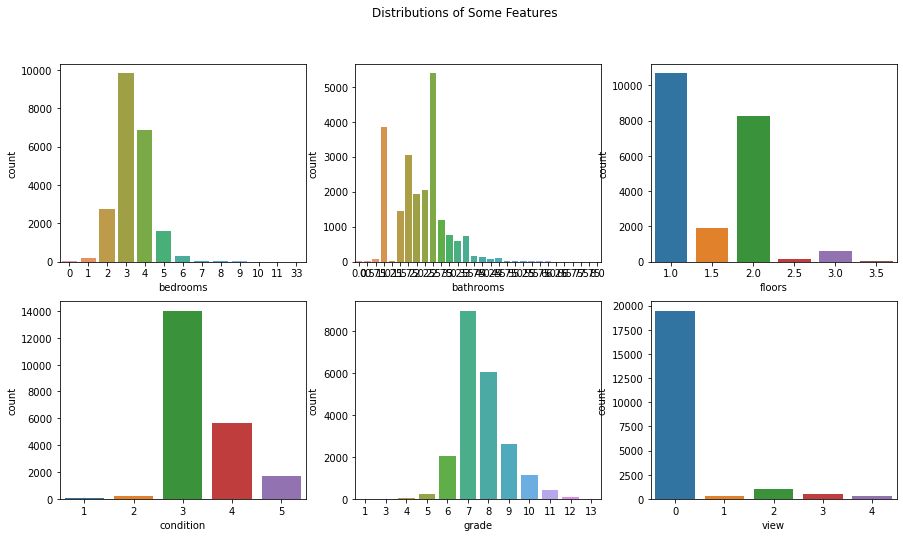

In [16]:
list2 = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'view']

plt.figure(figsize = (15,8))
for i, col in enumerate(list2):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, data = df)
plt.suptitle('Distributions of Some Features')
plt.show()

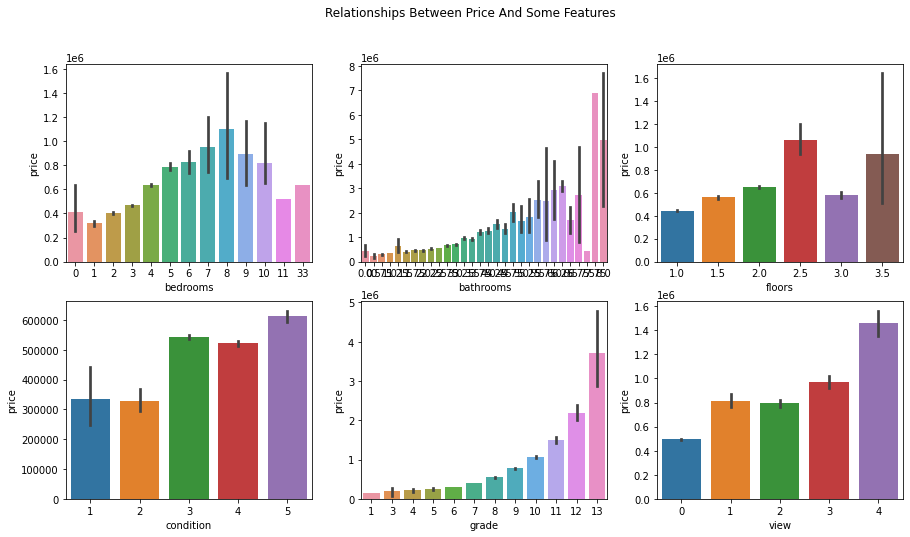

In [17]:
list2 = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'view']

plt.figure(figsize = (15,8))
for i, col in enumerate(list2):
    plt.subplot(2,3,i+1)
    sns.barplot(x = col, y='price', data = df)
plt.suptitle('Relationships Between Price And Some Features')
plt.show()

In [18]:
list2_y = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'view', 'price']
corr = df[list2_y].corr()
print("Pearson correlation between 'price' and features:")
corr.iloc[6,0:6].sort_values(ascending=False)

Pearson correlation between 'price' and features:


grade        0.667434
bathrooms    0.525138
view         0.397293
bedrooms     0.308350
floors       0.256794
condition    0.036362
Name: price, dtype: float64

Conclusion: there is strong correlation between price and grade. The barplots show that the relationship between price and bedrooms is nonlinear.

In [19]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

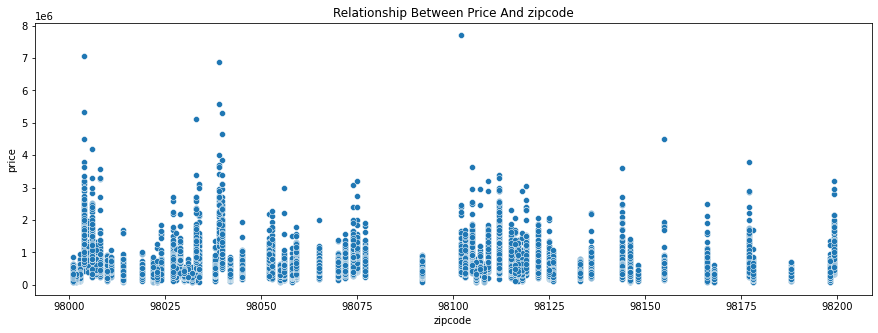

In [20]:
plt.figure(figsize = (15,5))
sns.scatterplot(x='zipcode', y='price', data = df)
plt.title('Relationship Between Price And zipcode')
plt.show()

In [21]:
corr = df[['zipcode', 'price']].corr()
print("Pearson correlation between 'price' and ''zipcode':")
corr

Pearson correlation between 'price' and ''zipcode':


,zipcode,price
zipcode,1.000000,-0.053203
price,-0.053203,1.000000


Conclusion: the Pearson correlation between price and zipcode is weak. But the scatterplot show zipcode can affect price dramatically. The influence of zipcode cannot be revealed by zipcode numbers, which have no meaning. We need do one hot encoding for zipcode.

## 4 Data Cleaning and Feature Engineering

### 4.1 Transform Date 

In [22]:
df.drop('id', axis=1, inplace=True)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.drop("date", axis=1, inplace=True)

In [23]:
data0 = df.copy() # original data
data0.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


###4.2 Transforming skewed variables

In [24]:
data1 = df.copy() 

In [25]:
skew_limit = 0.75 
skew_vals = data1.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols   # list skew variables

,Skew
sqft_lot,13.060019
waterfront,11.385108
sqft_lot15,9.506743
yr_renovated,4.549493
price,4.024069
view,3.395750
bedrooms,1.974300
sqft_basement,1.577965
sqft_living,1.471555
sqft_above,1.446664


In [26]:
col_with_zero = []
col_without_zero = []

for col in skew_cols.index.values:
    if data1[col].gt(0).all().all():
       col_without_zero.append(col)
    else:
      if data1[col].ge(0).all().all():
         col_with_zero.append(col)

print('col_with_zero', col_with_zero)
print('col_without_zero', col_without_zero)

col_with_zero ['waterfront', 'yr_renovated', 'view', 'bedrooms', 'sqft_basement']
col_without_zero ['sqft_lot', 'sqft_lot15', 'price', 'sqft_living', 'sqft_above', 'sqft_living15', 'condition', 'grade', 'year']


In [27]:
for col in col_without_zero:
    data1[col] = np.log(data1[col])

for col in col_with_zero:
    data1[col] = np.sqrt(data1[col])

In [28]:
skew_vals = data1.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols   # list skew variables

,Skew
waterfront,11.385108
yr_renovated,4.549144
view,2.907076
sqft_lot15,0.966568
sqft_lot,0.962171
long,0.885053
sqft_basement,0.783788
year,0.757299


###4.3 One-hot encoding

In [29]:
data2 = pd.get_dummies(data1, columns=['zipcode'], drop_first=True) 
data2 # one hot encoded data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,1.732051,1.00,7.073270,8.639411,1.0,0.0,0.0,1.098612,1.945910,7.073270,0.000000,1955,0.000000,47.5112,-122.257,7.200425,8.639411,7.607878,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,1.732051,2.25,7.851661,8.887653,2.0,0.0,0.0,1.098612,1.945910,7.682482,20.000000,1951,44.620623,47.7210,-122.319,7.432484,8.941022,7.607878,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,1.414214,1.00,6.646391,9.210340,1.0,0.0,0.0,1.098612,1.791759,6.646391,0.000000,1933,0.000000,47.7379,-122.233,7.908387,8.994917,7.608374,2,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,2.000000,3.00,7.580700,8.517193,1.0,0.0,0.0,1.609438,1.945910,6.956545,30.166206,1965,0.000000,47.5208,-122.393,7.215240,8.517193,7.607878,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,1.732051,2.00,7.426549,8.997147,1.0,0.0,0.0,1.098612,2.079442,7.426549,0.000000,1987,0.000000,47.6168,-122.045,7.495542,8.923058,7.608374,2,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,1.732051,2.50,7.333023,7.030857,3.0,0.0,0.0,1.098612,2.079442,7.333023,0.000000,2009,0.000000,47.6993,-122.346,7.333023,7.319202,7.607878,5,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,12.899220,2.000000,2.50,7.745003,8.667852,2.0,0.0,0.0,1.098612,2.079442,7.745003,0.000000,2014,0.000000,47.5107,-122.362,7.512071,8.881836,7.608374,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21610,12.904459,1.414214,0.75,6.927558,7.207860,2.0,0.0,0.0,1.098612,1.945910,6.927558,0.000000,2009,0.000000,47.5944,-122.299,6.927558,7.604396,7.607878,6,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,12.899220,1.732051,2.50,7.377759,7.778211,2.0,0.0,0.0,1.098612,2.079442,7.377759,0.000000,2004,0.000000,47.5345,-122.069,7.251345,7.160069,7.608374,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Training and Testing

### 5.1 Origin Data

5.1.1 Linear Regression

In [30]:
y_col = "price"
X = data0.drop(y_col, axis=1)
y = data0[y_col]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72018)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

s = StandardScaler()
lr = LinearRegression()

In [33]:
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)
r2_score(y_pred, y_test)

0.5881395552341535

In [34]:
lr.coef_

array([-3.47920682e+04,  2.82062003e+04, -2.08845099e+18,  4.71543166e+03,
        5.71281271e+03,  4.68835048e+04,  4.17148074e+04,  1.76032494e+04,
        1.12712080e+05,  1.88772883e+18,  9.97015990e+17, -7.95822511e+04,
        9.57803035e+03, -3.18023595e+04,  8.36307740e+04, -3.09144670e+04,
        1.25617132e+04, -1.02809392e+04,  1.68256468e+04,  3.73127191e+03,
       -3.63080315e+03])

In [35]:
feature_importances = pd.DataFrame(zip(X.columns.tolist(), lr.coef_.ravel()))
feature_importances.sort_values(by=1)

,0,1
2,sqft_living,-2.088451e+18
11,yr_built,-7.958225e+04
0,bedrooms,-3.479207e+04
13,zipcode,-3.180236e+04
15,long,-3.091447e+04
17,sqft_lot15,-1.028094e+04
20,day,-3.630803e+03
19,month,3.731272e+03
3,sqft_lot,4.715432e+03
4,floors,5.712813e+03


5.1.2 Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False,)

In [37]:
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)
X_train_pf_s = s.fit_transform(X_train_pf)
X_test_pf_s = s.transform(X_test_pf)

In [38]:
lr.fit(X_train_pf_s, y_train)
y_pred = lr.predict(X_test_pf_s)
r2_score(y_pred, y_test)

0.7988484085043589

5.1.3 Ridge Regression

In [198]:
from sklearn.linear_model import Ridge

alpha_space = np.geomspace(0.0000001, 1000, num=10)
r2_scores = []

for alpha in alpha_space:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_pf_s, y_train)
    y_pred = ridge.predict(X_test_pf_s)
    r2_scores.append(r2_score(y_pred, y_test))

r2_scores

[0.7988593843265457,
 0.7988500244885992,
 0.7987462529757572,
 0.797742063774548,
 0.7918583668726689,
 0.7701622230414422,
 0.7454523903154262,
 0.7334868232691798,
 0.7292033239039657,
 0.7145697686780597]

### 5.2 Data After Skewed Transformation

5.2.1 Linear Regression

In [39]:
y_col = "price"
X = data1.drop(y_col, axis=1)
y = data1[y_col]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72018)
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)
r2_score(y_pred, y_test)

0.6951005782547892

In [41]:
feature_importances = pd.DataFrame(zip(X.columns.tolist(), lr.coef_.ravel()))
feature_importances.sort_values(by=1)

,0,1
11,yr_built,-0.113845
13,zipcode,-0.032810
0,bedrooms,-0.031861
17,sqft_lot15,-0.030146
15,long,-0.011953
20,day,-0.005772
19,month,0.007380
3,sqft_lot,0.012939
12,yr_renovated,0.013406
4,floors,0.030219


5.2.2 Polynomial Regression

In [206]:
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)
X_train_pf_s = s.fit_transform(X_train_pf)
X_test_pf_s = s.transform(X_test_pf)

In [207]:
lr.fit(X_train_pf_s, y_train)
y_pred = lr.predict(X_test_pf_s)
r2_score(y_pred, y_test)

0.796763333207631

5.2.3 Ridge Regression

In [208]:
alpha_space = np.geomspace(0.0000001, 1000, num=10)
r2_scores = []

for alpha in alpha_space:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_pf_s, y_train)
    y_pred = ridge.predict(X_test_pf_s)
    r2_scores.append(r2_score(y_pred, y_test))

r2_scores

[0.7968962468922889,
 0.7968802897215473,
 0.7967744231163665,
 0.796461327061956,
 0.7927704277354232,
 0.7691716340920677,
 0.743943150601489,
 0.7309845718341713,
 0.7193095041038096,
 0.7031830794561251]

### 5.3 Data After One hot Encoding

5.3.1 Linear Regression

In [225]:
y_col = "price"
X = data2.drop(y_col, axis=1)
y = data2[y_col]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72018)
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)
r2_score(y_pred, y_test)

0.8646366113355375

In [227]:
feature_importances = pd.DataFrame(zip(X.columns.tolist(), lr.coef_.ravel()))
feature_importances.sort_values(by=1)

,0,1
14,long,-0.049018
0,bedrooms,-0.016419
16,sqft_lot15,-0.010606
4,floors,-0.010394
32,zipcode_98023,-0.008929
...,...,...
67,zipcode_98112,0.103016
9,sqft_above,0.106977
68,zipcode_98115,0.107463
61,zipcode_98103,0.109750


5.3.2 Polynomial Regression

In [212]:
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)
X_train_pf_s = s.fit_transform(X_train_pf)
X_test_pf_s = s.transform(X_test_pf)

In [213]:
lr.fit(X_train_pf_s, y_train)
y_pred = lr.predict(X_test_pf_s)
r2_score(y_pred, y_test)

-0.00045863042802851695

5.3.3 Ridge Regression

In [228]:
alpha_space = np.geomspace(0.0001, 100000, num=20)
r2_scores_1 = []

for alpha in alpha_space:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_pf_s, y_train)
    y_pred = ridge.predict(X_test_pf_s)
    r2_scores_1.append(r2_score(y_pred, y_test))

r2_scores_1

[0.26548564577475153,
 0.4505504205354417,
 0.6722707076729268,
 0.8263912915553975,
 0.8704212366367942,
 0.8760867730249401,
 0.8762252146472583,
 0.876157881050386,
 0.875977869137438,
 0.8754046184923941,
 0.8747754297982643,
 0.8746123726404805,
 0.8749091182488404,
 0.8750747260516079,
 0.8742198519900808,
 0.8711503009251345,
 0.8642066524145827,
 0.8494221512036588,
 0.8178867510153705,
 0.7348859816995872]

### 5.4 One hot coded data without unskewed transformation

In [229]:
data3 = pd.get_dummies(data0, columns=['zipcode'], drop_first=True)

In [230]:
y_col = "price"
X = data3.drop(y_col, axis=1)
y = data3[y_col]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72018)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)
X_train_pf_s = s.fit_transform(X_train_pf)
X_test_pf_s = s.transform(X_test_pf)

In [232]:
alpha_space = np.geomspace(0.0001, 100000, num=20)
r2_scores_2 = []

for alpha in alpha_space:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_pf_s, y_train)
    y_pred = ridge.predict(X_test_pf_s)
    r2_scores_2.append(r2_score(y_pred, y_test))

r2_scores_2

[0.8784796603556883,
 0.7354403739131087,
 0.7684877046492722,
 0.8464629384044857,
 0.8781857326201719,
 0.8858688653789419,
 0.8881194696867144,
 0.8894074709084008,
 0.8900697143420317,
 0.8898423674790898,
 0.8892706135695861,
 0.8889513845102484,
 0.8887362352575003,
 0.8877608751164111,
 0.8850967528759094,
 0.8800316828353967,
 0.8717458392566629,
 0.8570086870925009,
 0.8263546987528688,
 0.744636996282025]

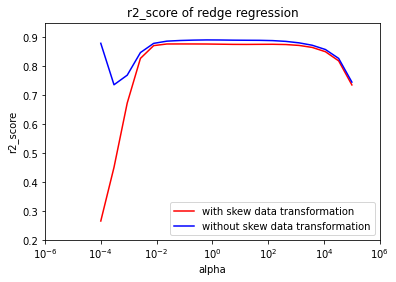

In [237]:
plt.figure(figsize = (6,4))
plt.semilogx(alpha_space, r2_scores_1, 'r',label='with skew data transformation')
plt.semilogx(alpha_space, r2_scores_2, 'b',label='without skew data transformation')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.xlim([1e-6,1e6])
plt.ylim([0.2,0.95])
plt.title('r2_score of redge regression')
plt.legend()
plt.show()

Conclusion: After one hot encoding, without skew data transformation, the Ridge regression gives out the best R2_score (0.890). The skewed data transformation reduce the performance and stability of the Ridge regression a little.

## 6 Final Results

In [7]:
r2_dict = {'original data':[0.588, 0.799, 0.799], 
           'after skewed transformation':[0.695,0.797,0.797 ], 
           'after skewed transformation and one hot encoding':[0.865, 0, 0.876]}

r2_df = pd.DataFrame.from_dict(r2_dict, orient='index', columns=['Linear','Polynomial','Ridge'])
r2_df

,Linear,Polynomial,Ridge
original data,0.588,0.799,0.799
after skewed transformation,0.695,0.797,0.797
after skewed transformation and one hot encoding,0.865,0.000,0.876


Conclusion: (1) Both skewed transformation and one hot encoding significantly improve the performance of linear regression. (2) Both skewed transformation and one hot encoding reduce the performance of polynomial regression. (3) One hot encoding significantly improve the performance of ridge regression, while skewed transformation does not help. (4) The Best r2_score comes from ridge regression (0.890) for one hot encoding data without skewed transformation. (5) The best r2_score of linear regression (0.865) is close to the best r2_score of ridge regression (0.890), which suggests what the ridge regression learned most from the dataset is the feature information about deviation from normal distribution